# Преобразования Фурье

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.integrate as spi


from scipy.linalg import dft, norm

import warnings
warnings.filterwarnings('ignore')

$\Re$
$\Im$
$\hat{a}$

## Задание 1. Вещественное: $f: \mathbb{R}→\mathbb{R}$

*N.B -  Используем унитарное преобразование Фурье к угловой частоте $\omega$*, оно будет выглядеть следующим образом

- Исходная функция
$$
f(t) = \frac{1}{\sqrt{2\pi}}\int^{+\infty}_{-\infty}c(\omega)e^{i\omega t}d\omega
$$
- Фурье-образ:
$$
c(\omega) = \frac{1}{\sqrt{2\pi}}\int^{+\infty}_{-\infty}f(t)e^{-i\omega t}dt
$$

### Прямоугольная функция

In [2]:
a = 2; b = 8

In [3]:
x = np.linspace(-10,10,8000)

In [4]:
def f1(t):
    if abs(t) <= b:
        return a
    elif abs(t) > b:
        return 0

vec_f1 = np.vectorize(f1)

Приведите аналитическое выражение её Фурье-образа $\hat{f}(\omega)$, также его вывод

In [5]:
def f1_image(omega):
  return ((2*a*b*np.sinc(omega*b))/np.sqrt(np.pi * 2))

In [6]:
def plot_original_and_image(x, f, f_image):
  figure, axis = plt.subplots(1, 2, figsize=(10, 6))

  axis[0].plot(x, [f(t) for t in x])
  axis[0].set_title(f"Original func with (a, b) = ({a}, {b})")
  axis[0].set_xlabel('t')
  axis[0].set_ylabel('y(t)')

  axis[1].plot(x, [f_image(t) for t in x])
  axis[1].set_title(f"Fourier image with (a, b) = ({a}, {b})")
  axis[1].set_xlabel('t')
  axis[1].set_ylabel('y(t)')

  plt.show()

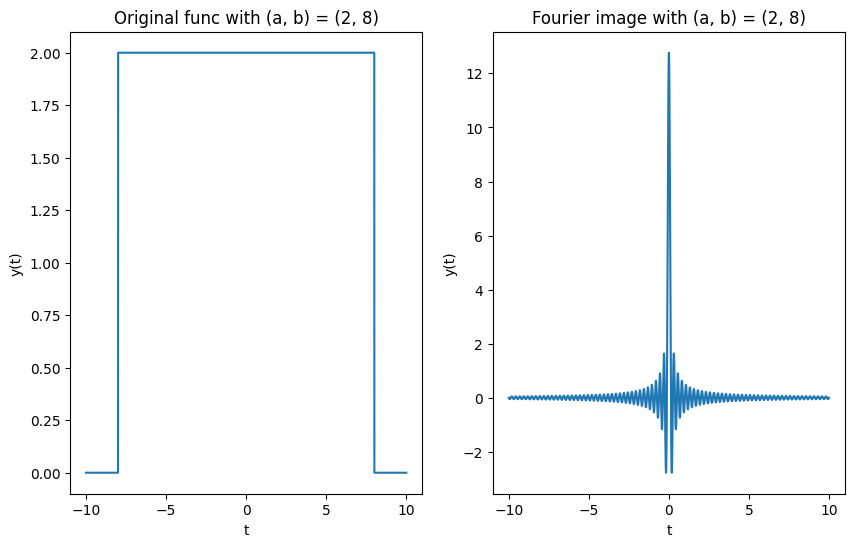

In [7]:
plot_original_and_image(x, vec_f1,f1_image)

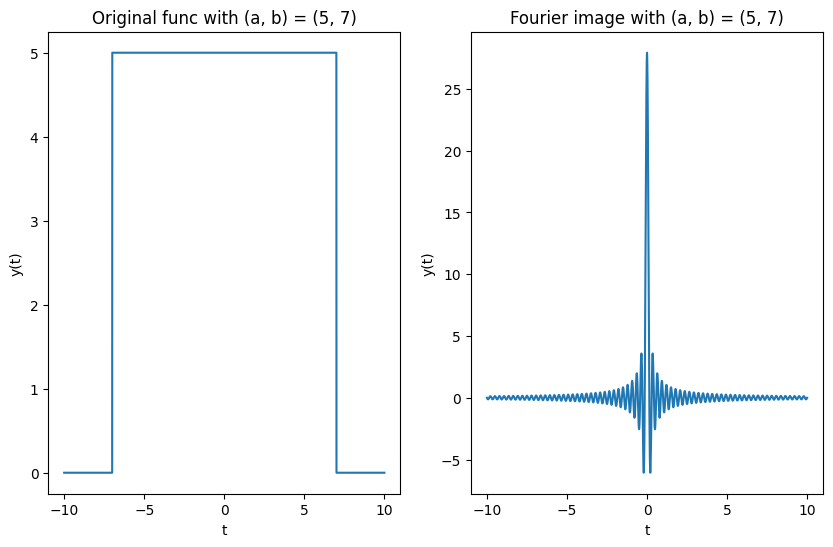

In [8]:
a = 5; b = 7;plot_original_and_image(x, vec_f1,f1_image)

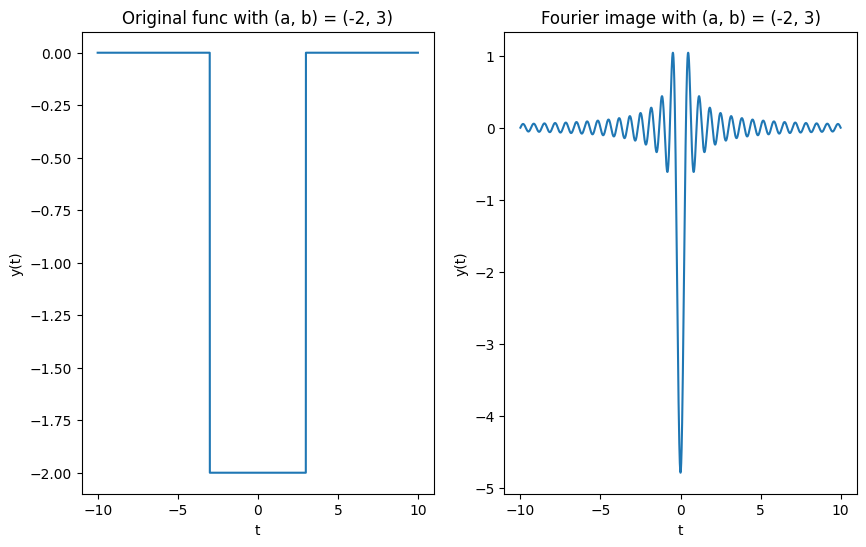

In [9]:
a = -2; b = 3; plot_original_and_image(x, vec_f1,f1_image)

Проверим равенство Парсеваля, в нашем случае оно будет выглядеть следующим
$$
||f||_2 = ||\mathbb{F}f||_2
$$, где $\mathbb{F}$ - оператор Фурье, а норму функции мы ищем на отрезке $(-\pi, \pi)$

Также вспомним про то, что применение оператора Фурье на функцию равняется её фурье образу...
$$
\mathbb{F}f = \hat{f}
$$ А значит можно записать равенство Парсеваля в более приближенной форме:

$$
\int^\pi_{-\pi}|f(t)|^2dt = ||\hat{f}||_2
$$

Полезно также знать, что у равенства Парсеваля в такой форме отображается полезное физическое свойство:

Важное соотношение между энергией сигнала во временной области и энергетическим спектром
в частотной области дается тождеством Парсеваля для преобразований Фурье

In [10]:
def check_parseval(f, f_image):
  INT1 = spi.quad(lambda t: abs(f(t))**2, -np.inf, +np.inf)[0]
  INT2 = spi.quad(lambda omega: abs(f_image(omega))**2, -np.inf, +np.inf)[0]
  print(f"delta: {abs(INT1-INT2)}")

check_parseval(vec_f1, f1_image)

delta: 16.359818648969025


### Анализ влияния параметров

Построим побольше графиков при разных а,б , чтобы иметь больше данных для анализа

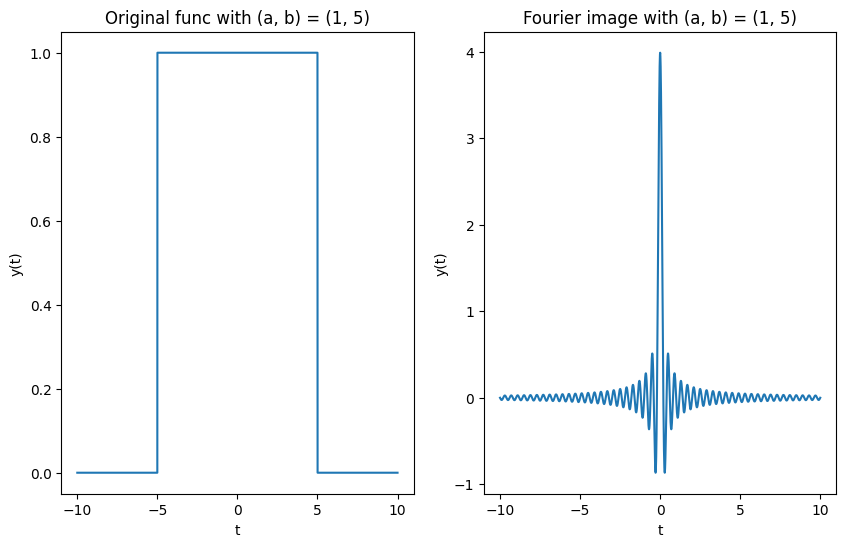

In [11]:
a = 1; b = 5; plot_original_and_image(x, vec_f1,f1_image)

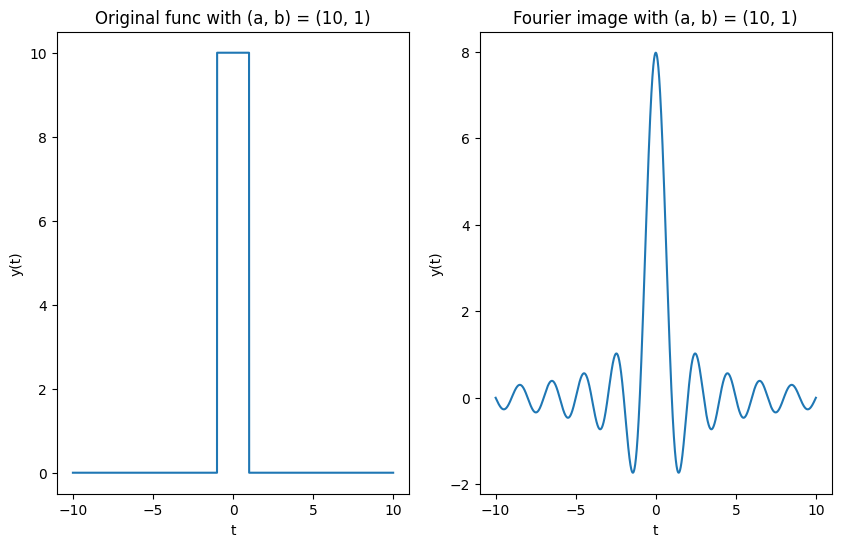

In [12]:
a = 10; b = 1; plot_original_and_image(x, vec_f1,f1_image)

В данном случае заметная следующая тенденция - при увеличении ширины волны, частота Фурье образа резко взрастает, он становится "сжатым"...



Принцип неопределённости можно привязать здесь следующим образом - чем более концентрированной является функция $f(t)$, тем более разнесенным должно быть её  преобразование Фурье $\hat{f}(\omega)$. В частности, такое свойство можно рассматривать как утверждение: если мы сжимаем функцию в t раз, то её преобразование Фурье растягивается на $\omega$.
**Невозможно** произвольно сконцентрировать как функцию, так и её преобразование Фурье.

Спасибо за это силе википедии, [Принцип неопределённости](https://en.wikipedia.org/wiki/Uncertainty_principle?useskin=vector), [Преобразование фурье](https://en.wikipedia.org/wiki/Fourier_transform?useskin=vector)

*Какая из функций может оказаться в точности равна своему
Фурье-образу?*

блин вроде в лекцциии говорили... а при каких а, б ???

### Треугольная функция



In [13]:
def f2(t):
    if abs(t) <= b:
        return a - abs(a*t/b)
    elif abs(t) > b:
        return 0

vec_f2 = np.vectorize(f2)

def f2_image(omega):
  return (1/np.sqrt(np.pi * 2)) * ( (2*a*(1-np.cos(b*omega))/(b*omega**2)) + 2*b*b*np.sinc(omega*b) - 2*a*b*np.sinc(omega*b) ) #(1/np.sqrt(np.pi * 2)) * 2*a*np.sinc(omega*b)

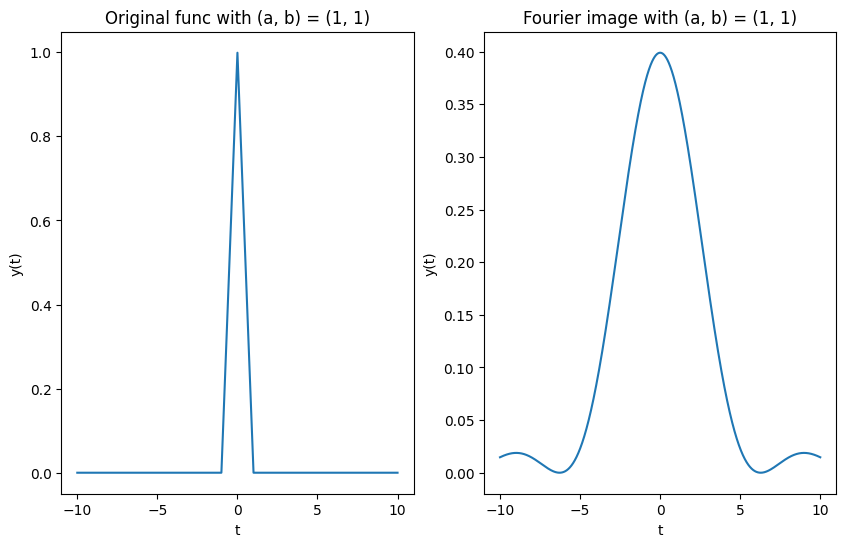

In [14]:
a = 1; b = 1; plot_original_and_image(x, vec_f2,f2_image)

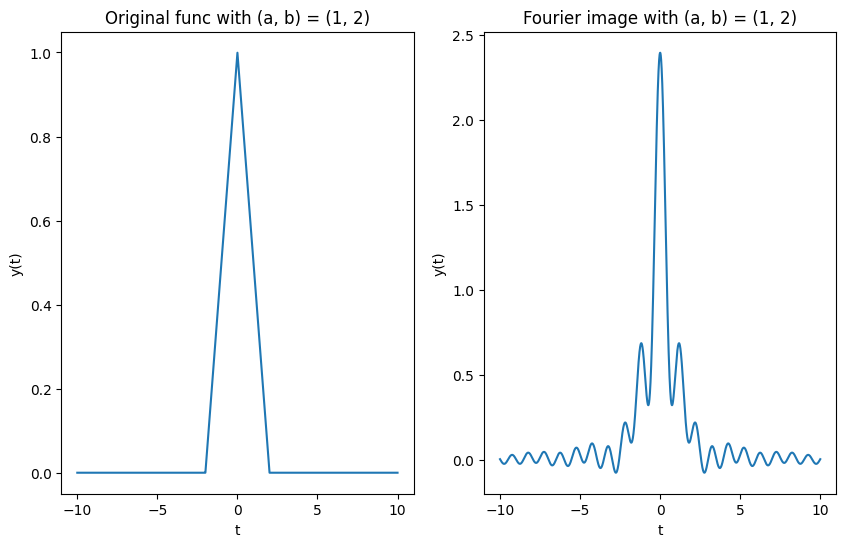

In [15]:
a = 1; b = 2; plot_original_and_image(x, vec_f2,f2_image)

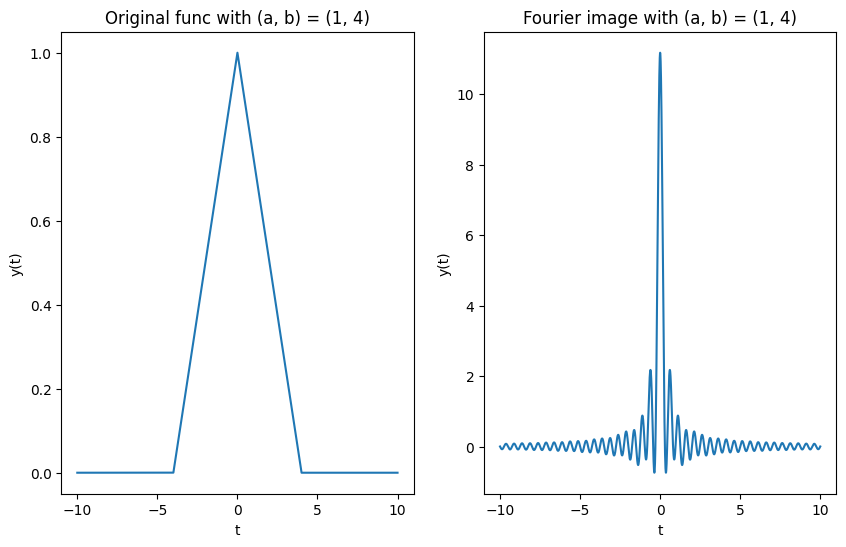

In [16]:
a = 1; b = 4; plot_original_and_image(x, vec_f2,f2_image)

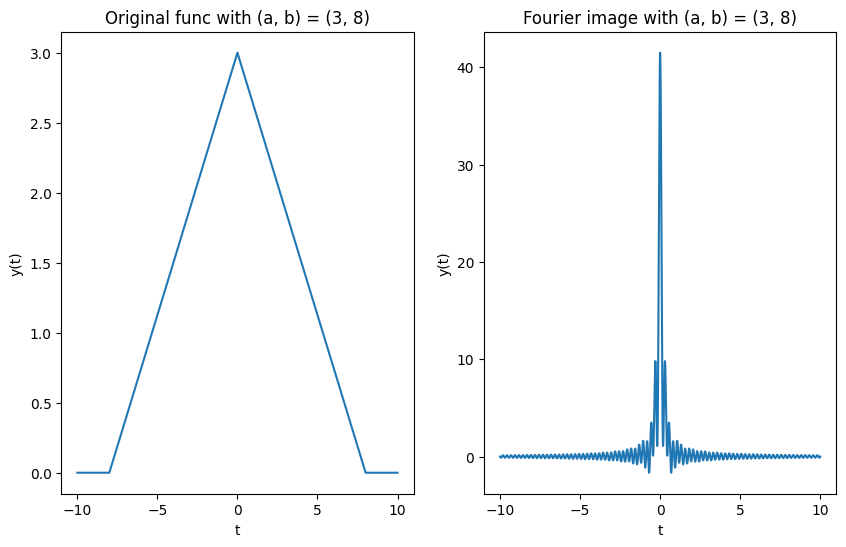

In [17]:
a = 3; b = 8; plot_original_and_image(x, vec_f2,f2_image)

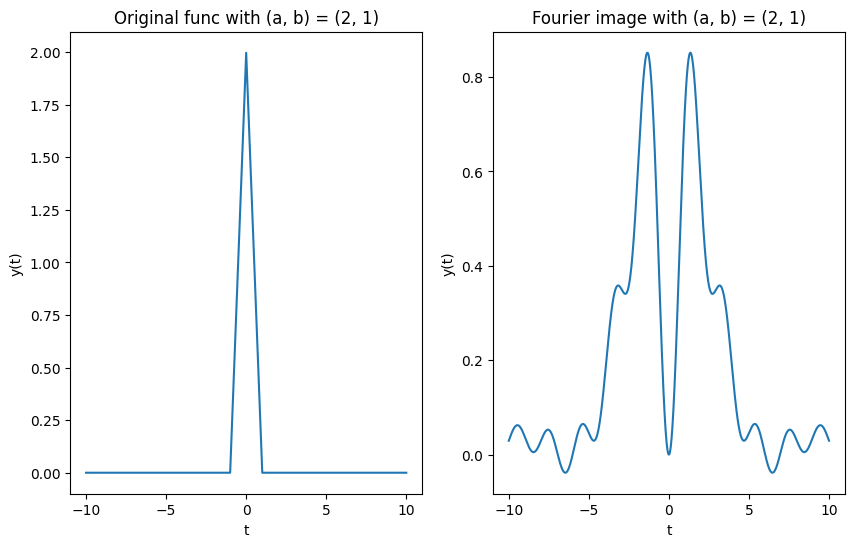

In [18]:
a =2; b = 1; plot_original_and_image(x, vec_f2,f2_image)

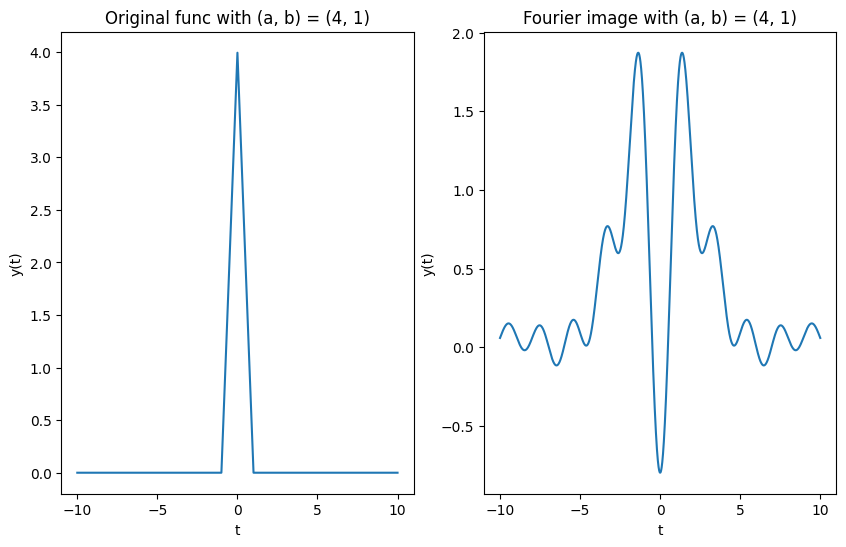

In [19]:
a = 4; b = 1; plot_original_and_image(x, vec_f2,f2_image)

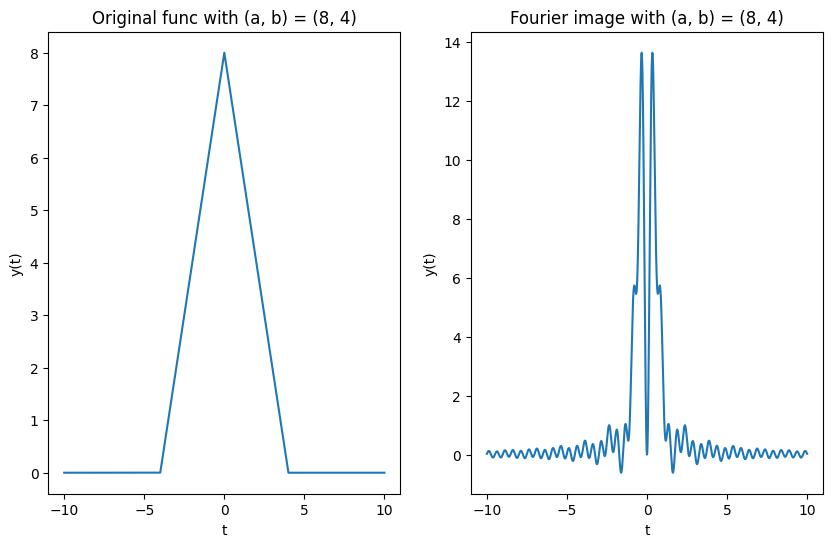

In [20]:
a = 8; b = 4; plot_original_and_image(x, vec_f2,f2_image)

In [21]:
check_parseval(vec_f2, f2_image)

delta: 40.741213910433174


### Кардинальный синус

In [22]:
def f3(t):
    return a*np.sinc(b*t)

vec_f3 = np.vectorize(f3)

def f3_image(omega):
  return ( a*np.pi /(2*np.sqrt(2* np.pi)) ) * (np.sign(omega + b) - np.sign(omega - b))

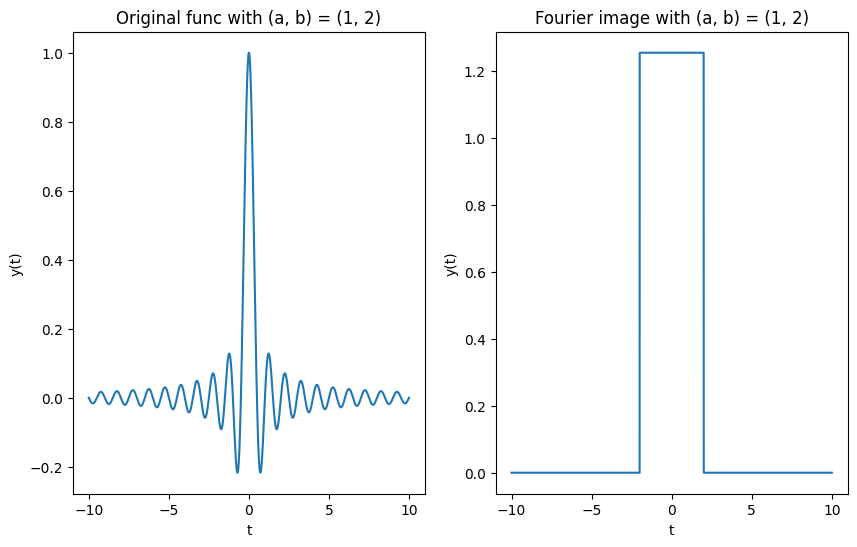

In [23]:
a = 1; b = 2; plot_original_and_image(x, vec_f3,f3_image)

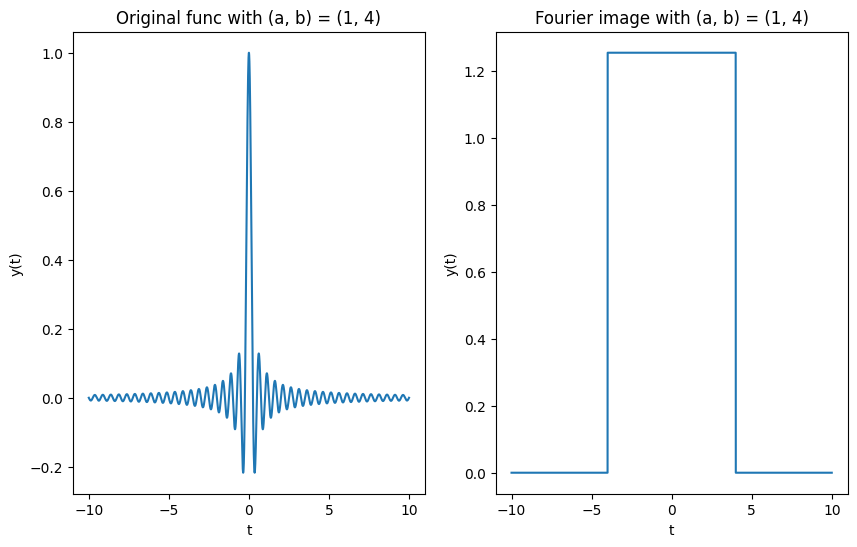

In [24]:
a = 1; b = 4; plot_original_and_image(x, vec_f3,f3_image)

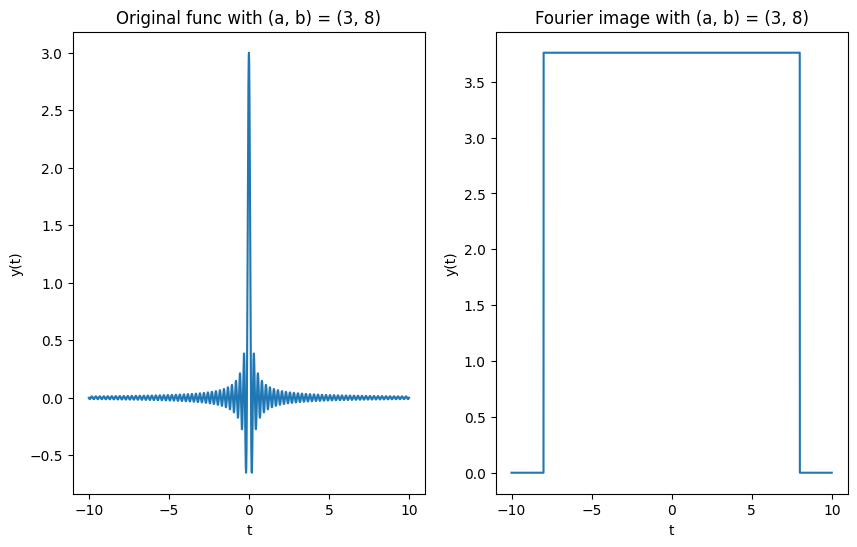

In [25]:
a = 3; b = 8; plot_original_and_image(x, vec_f3,f3_image)

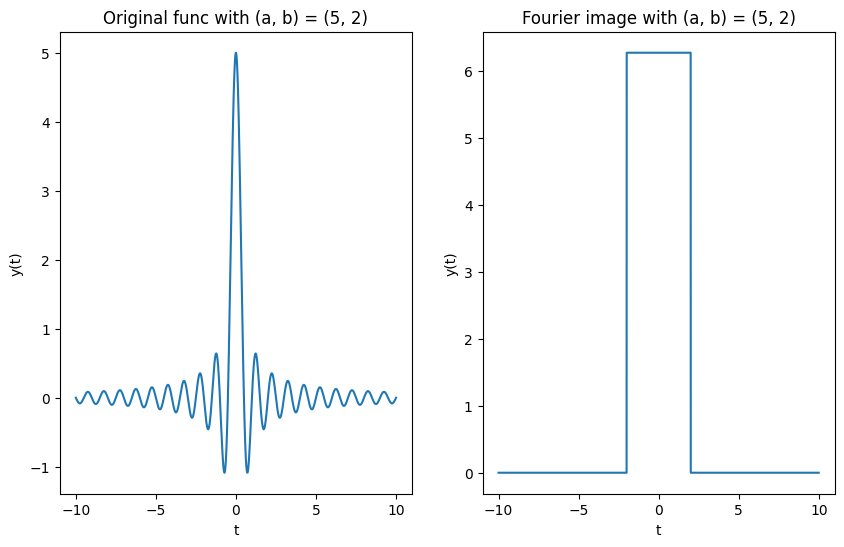

In [26]:
a = 5; b = 2; plot_original_and_image(x, vec_f3,f3_image)

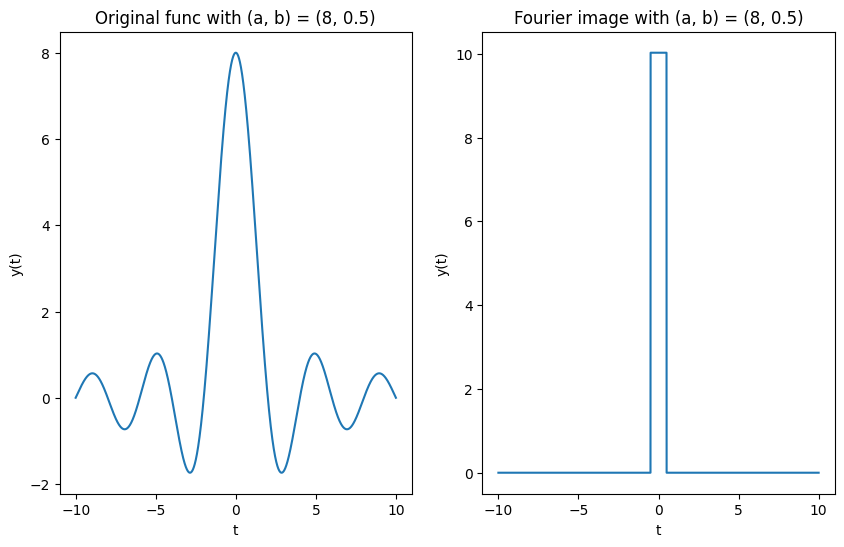

In [27]:
a = 8; b = 0.5; plot_original_and_image(x, vec_f3,f3_image)

Получается, что параметр $a$ отвечает за длину прямоугольника изображения, а значит и главный горбик функции, параметр b - за растяжение/сжатие прямоугольника, и следовательно, за сжатие/растяжение исходной функции...

In [28]:
check_parseval(vec_f3, f3_image)

delta: 27.49724390356431


### Функция Гаусса

In [29]:
def f4(t):
    return a*np.exp(-b*t**2)

vec_f4 = np.vectorize(f4)

def f4_image(omega):
  return (1/np.sqrt(2* np.pi)) * a * np.sqrt(np.pi / b) * np.exp(-omega**2/(4*b))

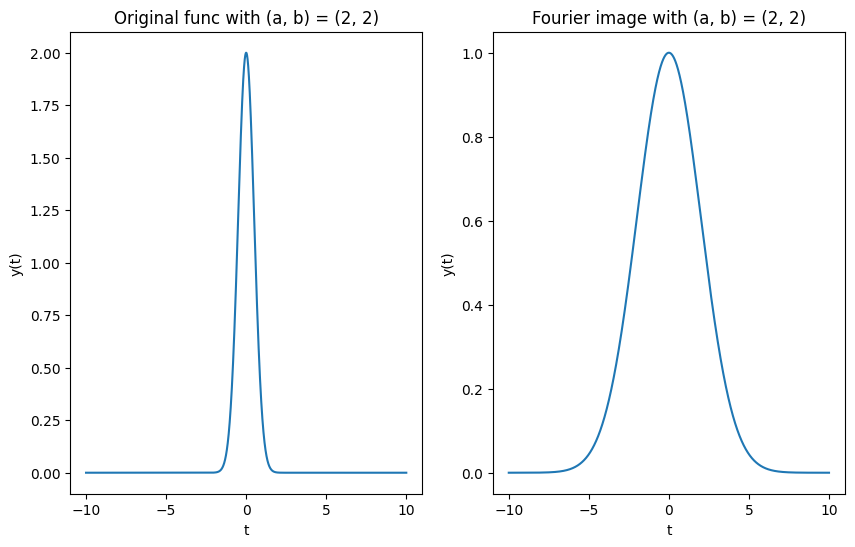

In [30]:
a = 2; b = 2; plot_original_and_image(x, vec_f4,f4_image)

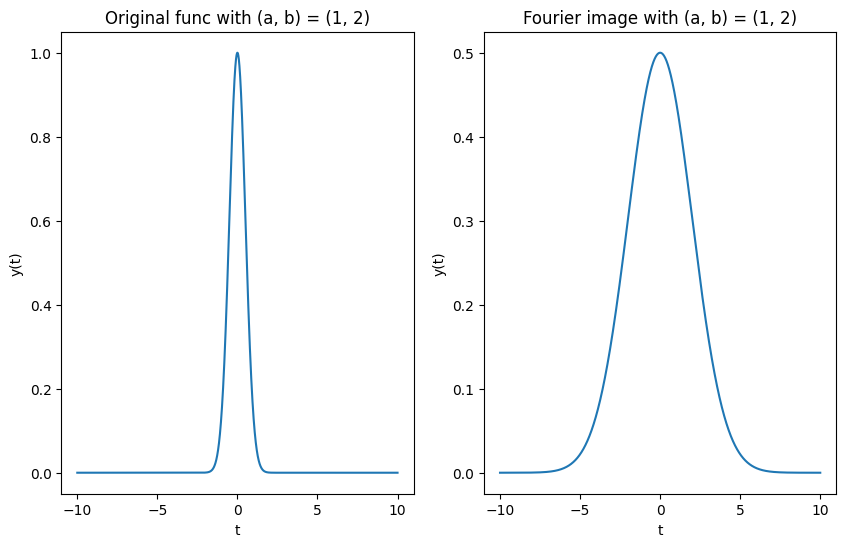

In [31]:
a = 1; b = 2; plot_original_and_image(x, vec_f4,f4_image)

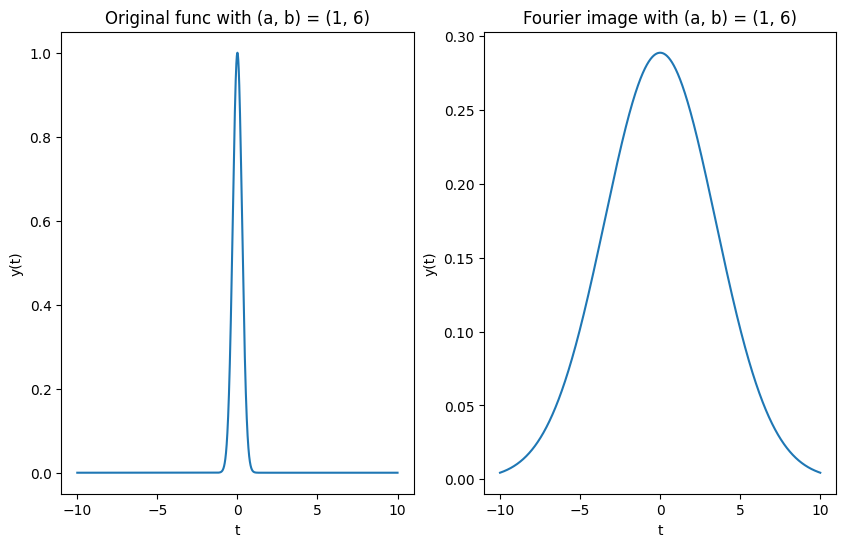

In [32]:
a = 1; b = 6; plot_original_and_image(x, vec_f4,f4_image)

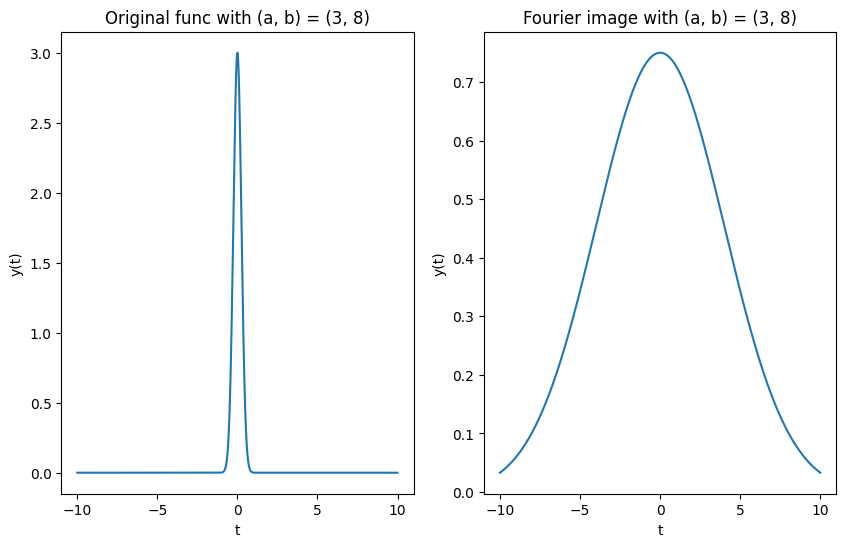

In [33]:
a = 3; b = 8; plot_original_and_image(x, vec_f4,f4_image)

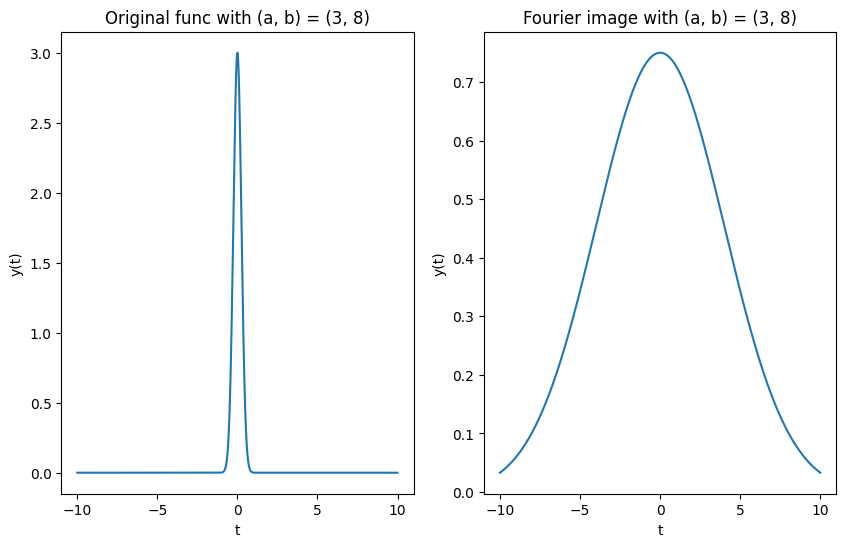

In [34]:
a = 3; b = 8; plot_original_and_image(x, vec_f4,f4_image)

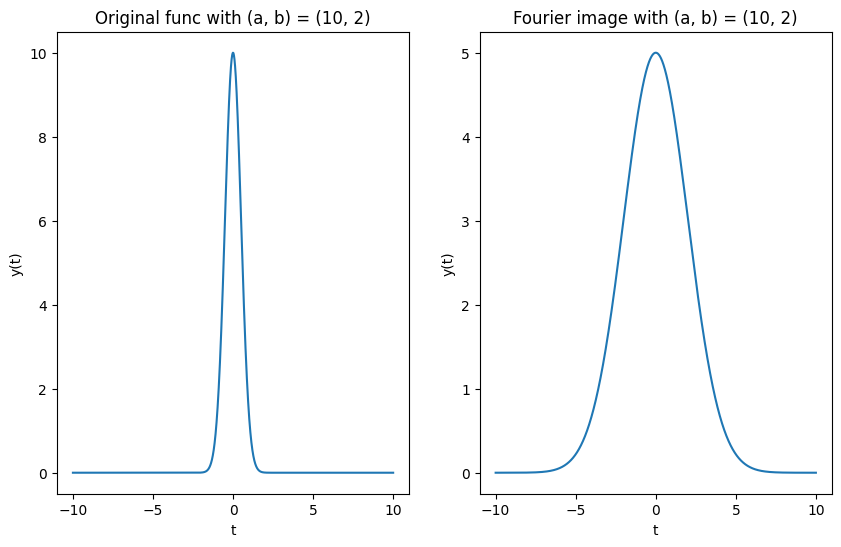

In [35]:
a = 10; b = 2; plot_original_and_image(x, vec_f4,f4_image)

In [36]:
check_parseval(vec_f4, f4_image)

delta: 1.4210854715202004e-14


### Двустороннее затухание

In [37]:
def f5(t):
    return a*np.exp( -b * abs(t) )

vec_f5 = np.vectorize(f5)

def f5_image(omega):
  return (1/np.sqrt(2* np.pi)) * (2*a*b)/(omega**2 + b**2)

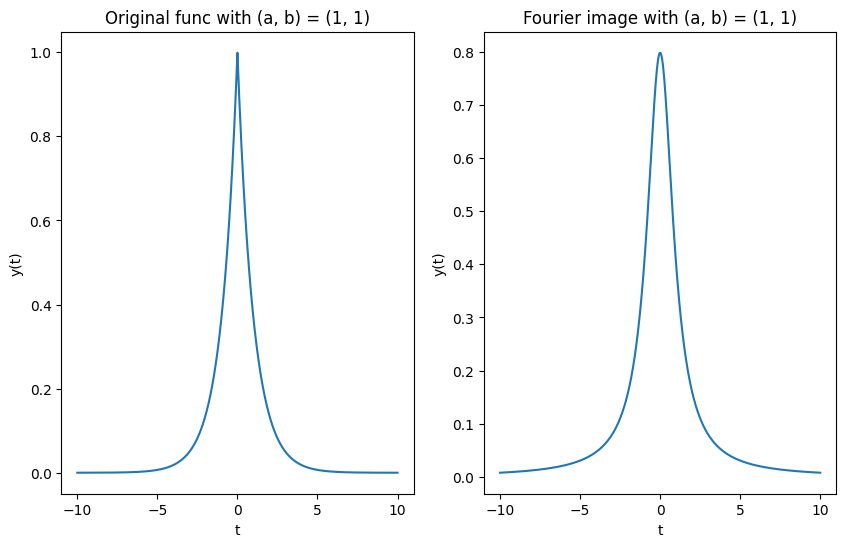

In [38]:
a = 1; b = 1; plot_original_and_image(x, vec_f5,f5_image)

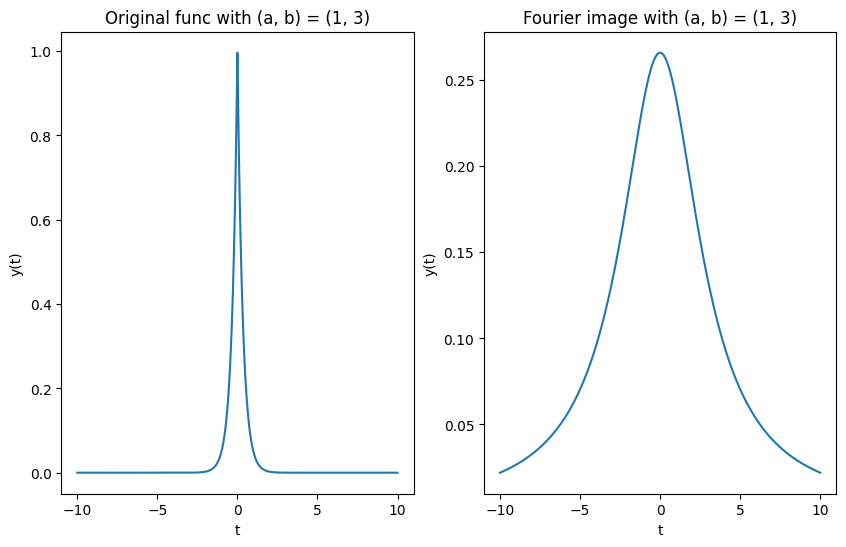

In [39]:
a = 1; b = 3; plot_original_and_image(x, vec_f5,f5_image)

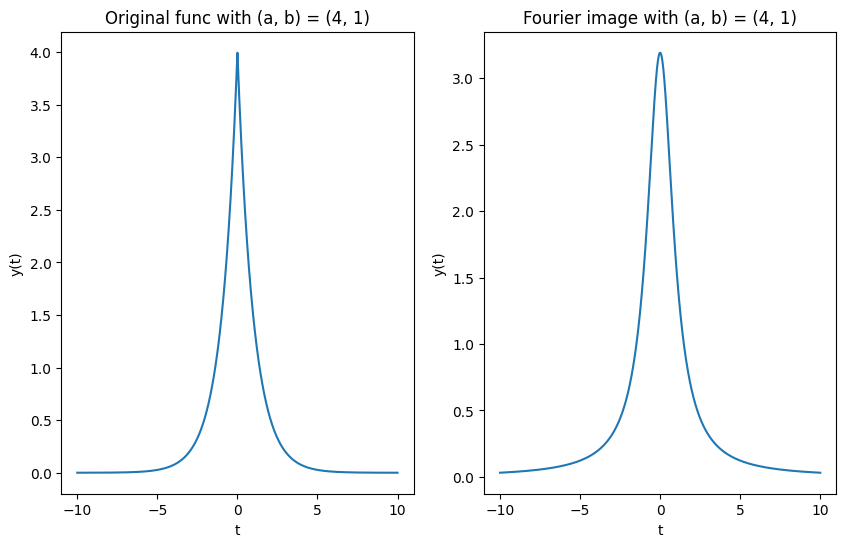

In [40]:
a = 4; b = 1; plot_original_and_image(x, vec_f5,f5_image)

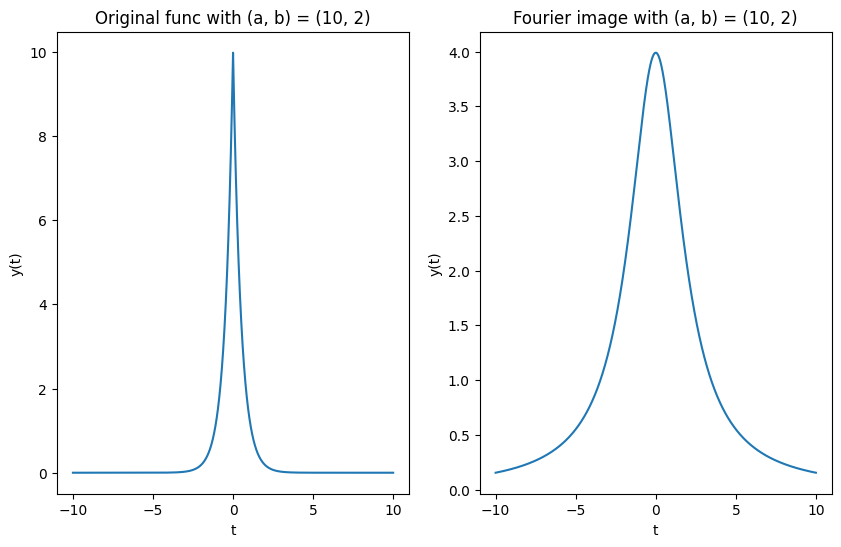

In [41]:
a = 10; b = 2; plot_original_and_image(x, vec_f5,f5_image)

In [42]:
check_parseval(vec_f5, f5_image)

delta: 4.263256414560601e-14


## Задание 2. Комплексное

Рассмотрим треугольную функцию

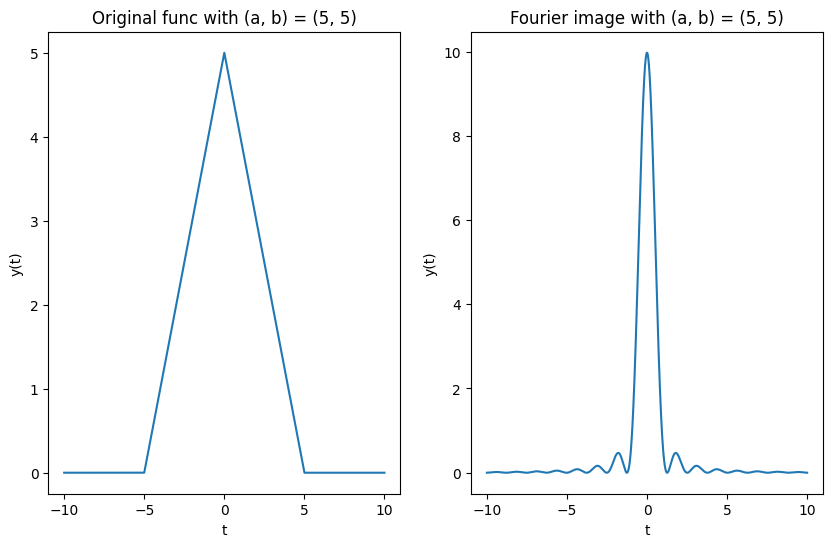

In [43]:
a=5;b=5; plot_original_and_image(x, vec_f2,f2_image)

Рассмотрим сдвинутую функцию $g(t) = f(t+c)$

Приведите аналитическое выражения для Фурье-образа $\hat{g}(\omega)$

In [44]:
c = -3

In [45]:
# shifted triangle function
def f6(t):
  T = t+c
  if abs(T) <= b:
    return a - abs(a*T/b)
  elif abs(T) > b:
    return 0

vec_f6 = np.vectorize(f6)

def f6_image(omega):
  return f2_image(omega) * np.exp(1j*omega*c)

Воспользуемся свойством оператора Фурье: для сдвига можно не вычислять новый образ, а воспользоваться свойством:

$$
\mathbb{F}f(t+\tau) = e^{i \omega\tau}\mathbb{F}f(t)
$$, где $\tau$- наш сдвиг

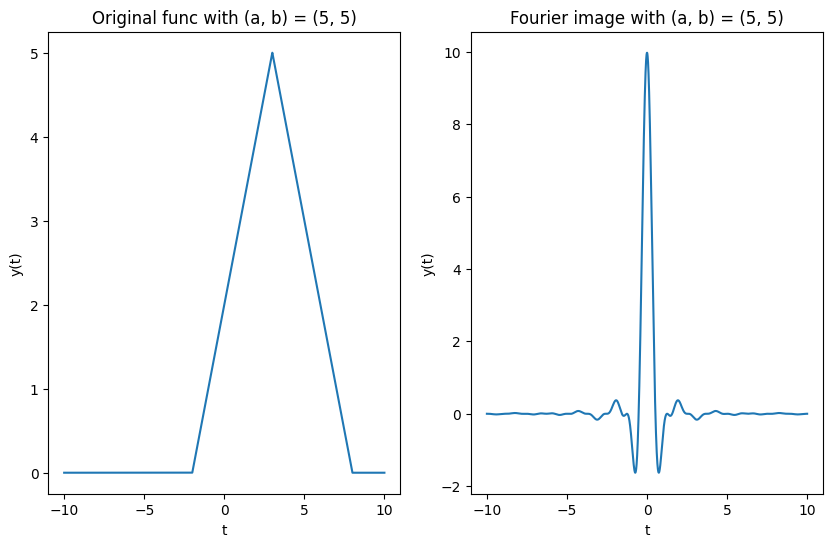

In [46]:
plot_original_and_image(x, vec_f6, f6_image)

Постройте графики функции $g(t)$ для нескольких значений параметра $c$

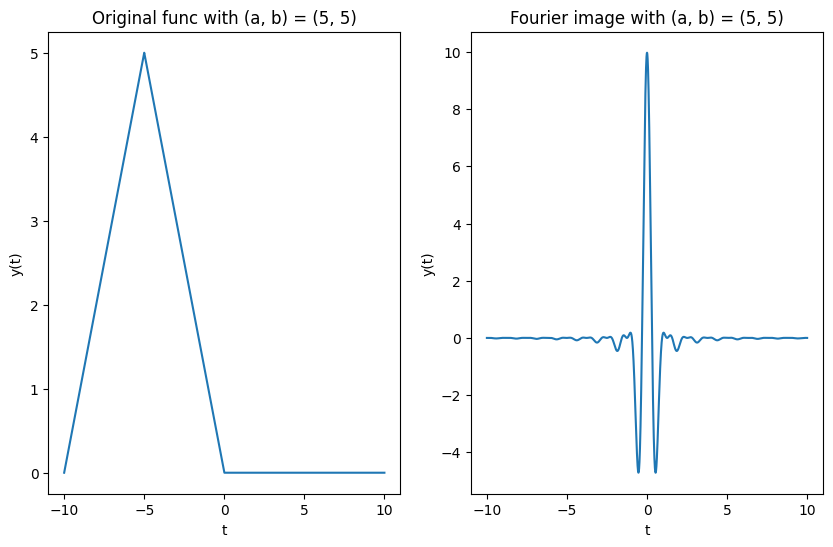

In [47]:
c = 5; plot_original_and_image(x, vec_f6, f6_image)

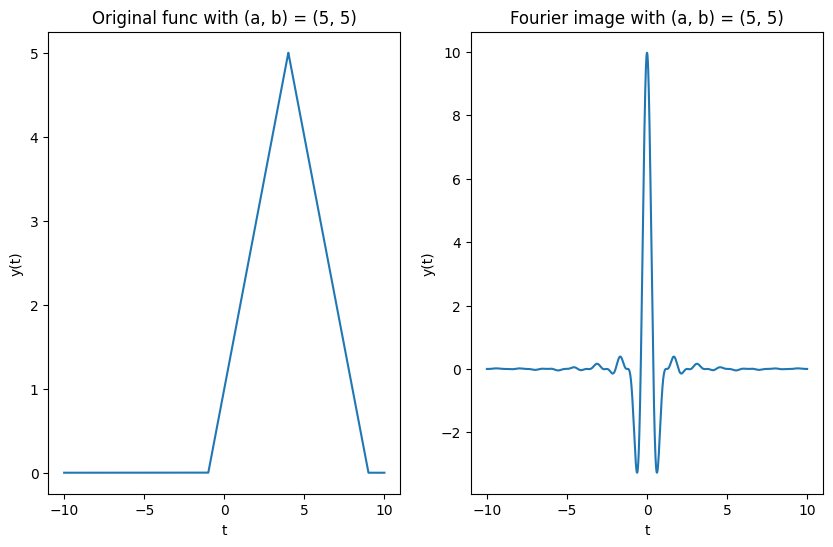

In [48]:
c = -4; plot_original_and_image(x, vec_f6, f6_image)

Постройте графики $Re\hat{g}(\omega)$ и $Im\hat{g}(\omega)$ вещественной и мнимой компоненты Фурье образа, а также график $|\hat{g}(\omega)|$ модуля Фурье-образа для каждого случа

In [49]:
# real complex
def components_fourier_image(x, f_image):
  figure, axis = plt.subplots(1, 2, figsize=(10, 6))
  axis[0].plot(x, [f_image(t).real for t in x])
  axis[0].set_title("Re$( \hat{g}(\omega) )$")
  axis[0].set_xlabel('t')
  axis[0].set_ylabel('y(t)')

  axis[1].plot(x, [f_image(t).imag for t in x])
  axis[1].set_title("Im$( \hat{g}(\omega) )$")
  axis[1].set_xlabel('t')
  axis[1].set_ylabel('y(t)')
  plt.show()

def module_fourier_image(x, f_image):
  plt.plot(x, [np.abs(f_image(t)) for t in x])
  plt.title("$|\hat{g}(\omega)|$")
  plt.xlabel('t')
  plt.ylabel('y(t)')
  plt.show()

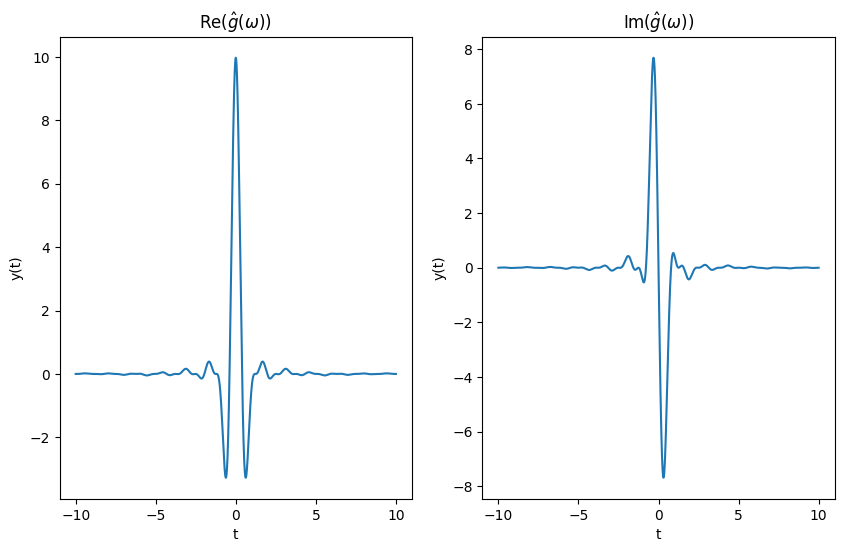

In [50]:
components_fourier_image(x, f6_image)

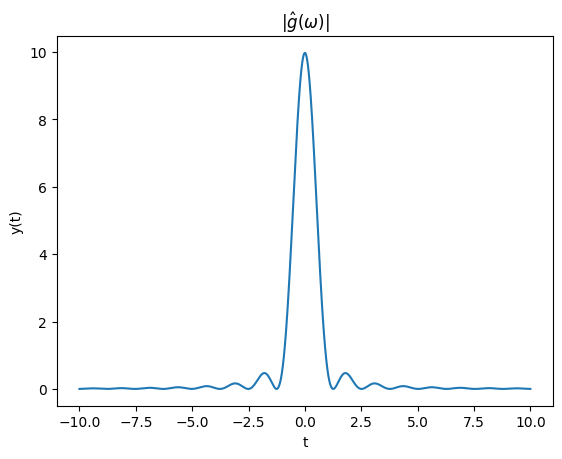

In [51]:
module_fourier_image(x, f6_image)

Проанализируйте влияние параметра $c$ на саму функцию и её Фурье-образ

Ну по сути... это сдвиг???

## Задание 3. Музыкальное

Здесь используем преобразование Фурье к обыкновенной частоте $\nu$.


На гугл диске только mp3 файлы, поэтому я воспользовался случайным конвертером в wav формат

In [52]:
from scipy.io import wavfile

In [53]:
sample_rate = 44100 # Hz

def plot_sound(file, time_limit=-1):
  sample_rate, data = wavfile.read(file)
  length = data.shape[0]/sample_rate
  time = np.linspace(0., length, data.shape[0])
  # data.shape = 2 --> so that's a stereo
  if time_limit == -1:
    plt.plot(time, data[:, 1], label="Right channel")
  else:
    plt.plot(time[:int(np.ceil(time_limit*sample_rate))], data[:int(np.ceil(time_limit*sample_rate)), 1], label="Right channel")

  plt.legend(loc='lower right')
  plt.xlabel("Time [s]")
  plt.ylabel("Amplitude")
  plt.show()

plot_sound('accord7.wav')
plot_sound('accord7.wav', 1)
plot_sound('accord7.wav', 0.035)
plot_sound('accord7.wav', 0.001)

FileNotFoundError: [Errno 2] No such file or directory: 'accord7.wav'

In [ ]:
plot_sound('accord19.wav')
plot_sound('accord19.wav', 1)
plot_sound('accord19.wav', 0.035)
plot_sound('accord19.wav', 0.001)

In [ ]:

# Assuming V, dv, t, y are defined previously in your code
v = np.linspace(0,10**4)  # Create an array of frequencies from 0 to V with step dv
Y = np.zeros(len(v), dtype=complex)  # Initialize an array of complex numbers for the results

for k in range(len(v)):
    Y[k] = np.trapz(y * np.exp(-1j * 2 * np.pi * v[k] * t), t)  # Perform the Fourier Transform using the trapezoidal rule


Образ ???

In [ ]:
def f7(t):
  length = data.shape[0]/sample_rate
  if not 0<= t <= length:
    return 0
  else:
    return data[int(np.ceil(t*sample_rate))-1, 1]
freq_space = np.linspace(0,sample_rate, 3000)

f7_image = np.arange(len(freq_space))


for freq in freq_space:
  np.append(f7_image, spi.quad(lambda t: f7(t)*np.exp(-1j*2*np.pi*freq*t), -np.inf, +np.inf)[0] )

def plot_image(time,freqs, f, f_image):
  figure, axis = plt.subplots(1, 2, figsize=(10, 6))

  axis[0].plot(time, [f(t) for t in time])
  axis[0].set_title(f"Original func with (a, b) = ({a}, {b})")
  axis[0].set_xlabel('t')
  axis[0].set_ylabel('y(t)')

  axis[1].plot(freqs, f7_image)
  axis[1].set_title(f"Fourier image with (a, b) = ({a}, {b})")
  axis[1].set_xlabel('freq')
  axis[1].set_ylabel('y(freq)')

  plt.show()

plot_image(time, freq_space, f7, f7_image)